# EDA Analysis

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
creditcard_df = pd.read_csv('../data/creditcard.csv')

In [3]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the Missing Value

In [4]:
print("Checking the Missing Value for the Creditcard")
print(creditcard_df.isnull().sum())

Checking the Missing Value for the Creditcard
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
creditcard_df.drop_duplicates(inplace=True)

In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

## Univariate Analysis for fraud class distribution
## Plot distributions for all features

Class
0    283253
1       473
Name: count, dtype: int64


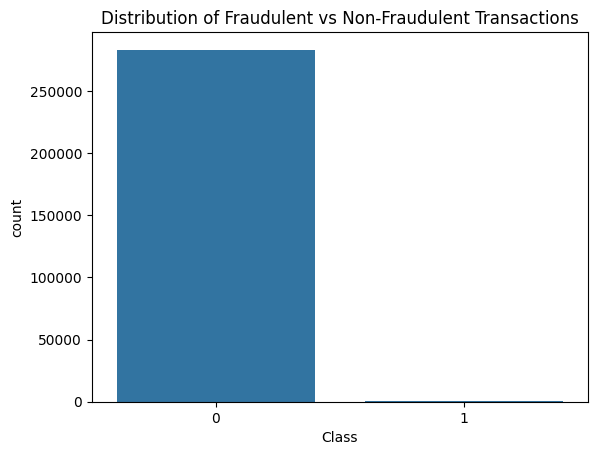

In [7]:
# Count of fraudulent vs non-fraudulent transactions
print(creditcard_df['Class'].value_counts())

# Plot the distribution
sns.countplot(x='Class', data=creditcard_df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

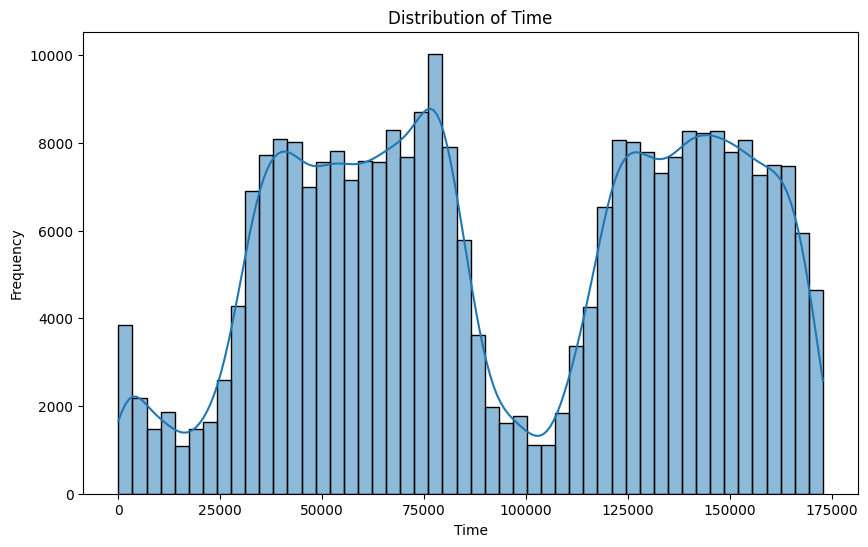

In [8]:
# Distribution of Time
plt.figure(figsize=(10, 6))
sns.histplot(creditcard_df['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

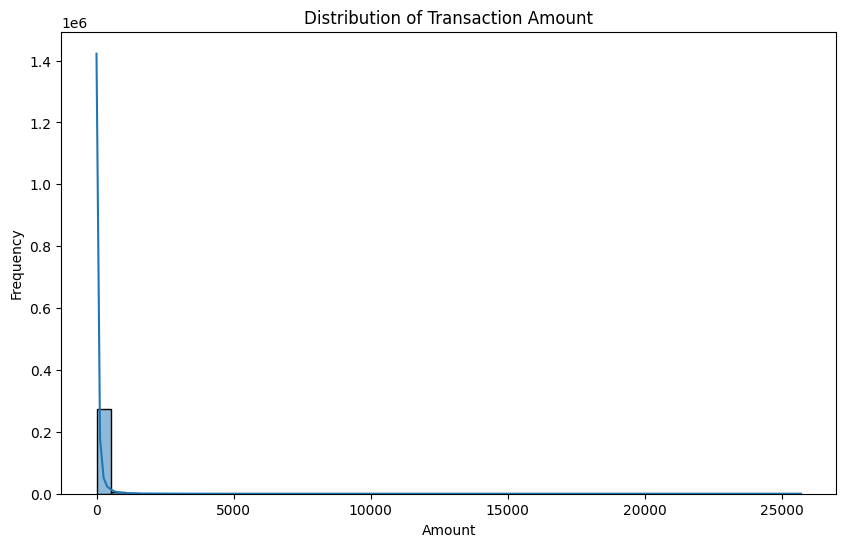

In [9]:
# Distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(creditcard_df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

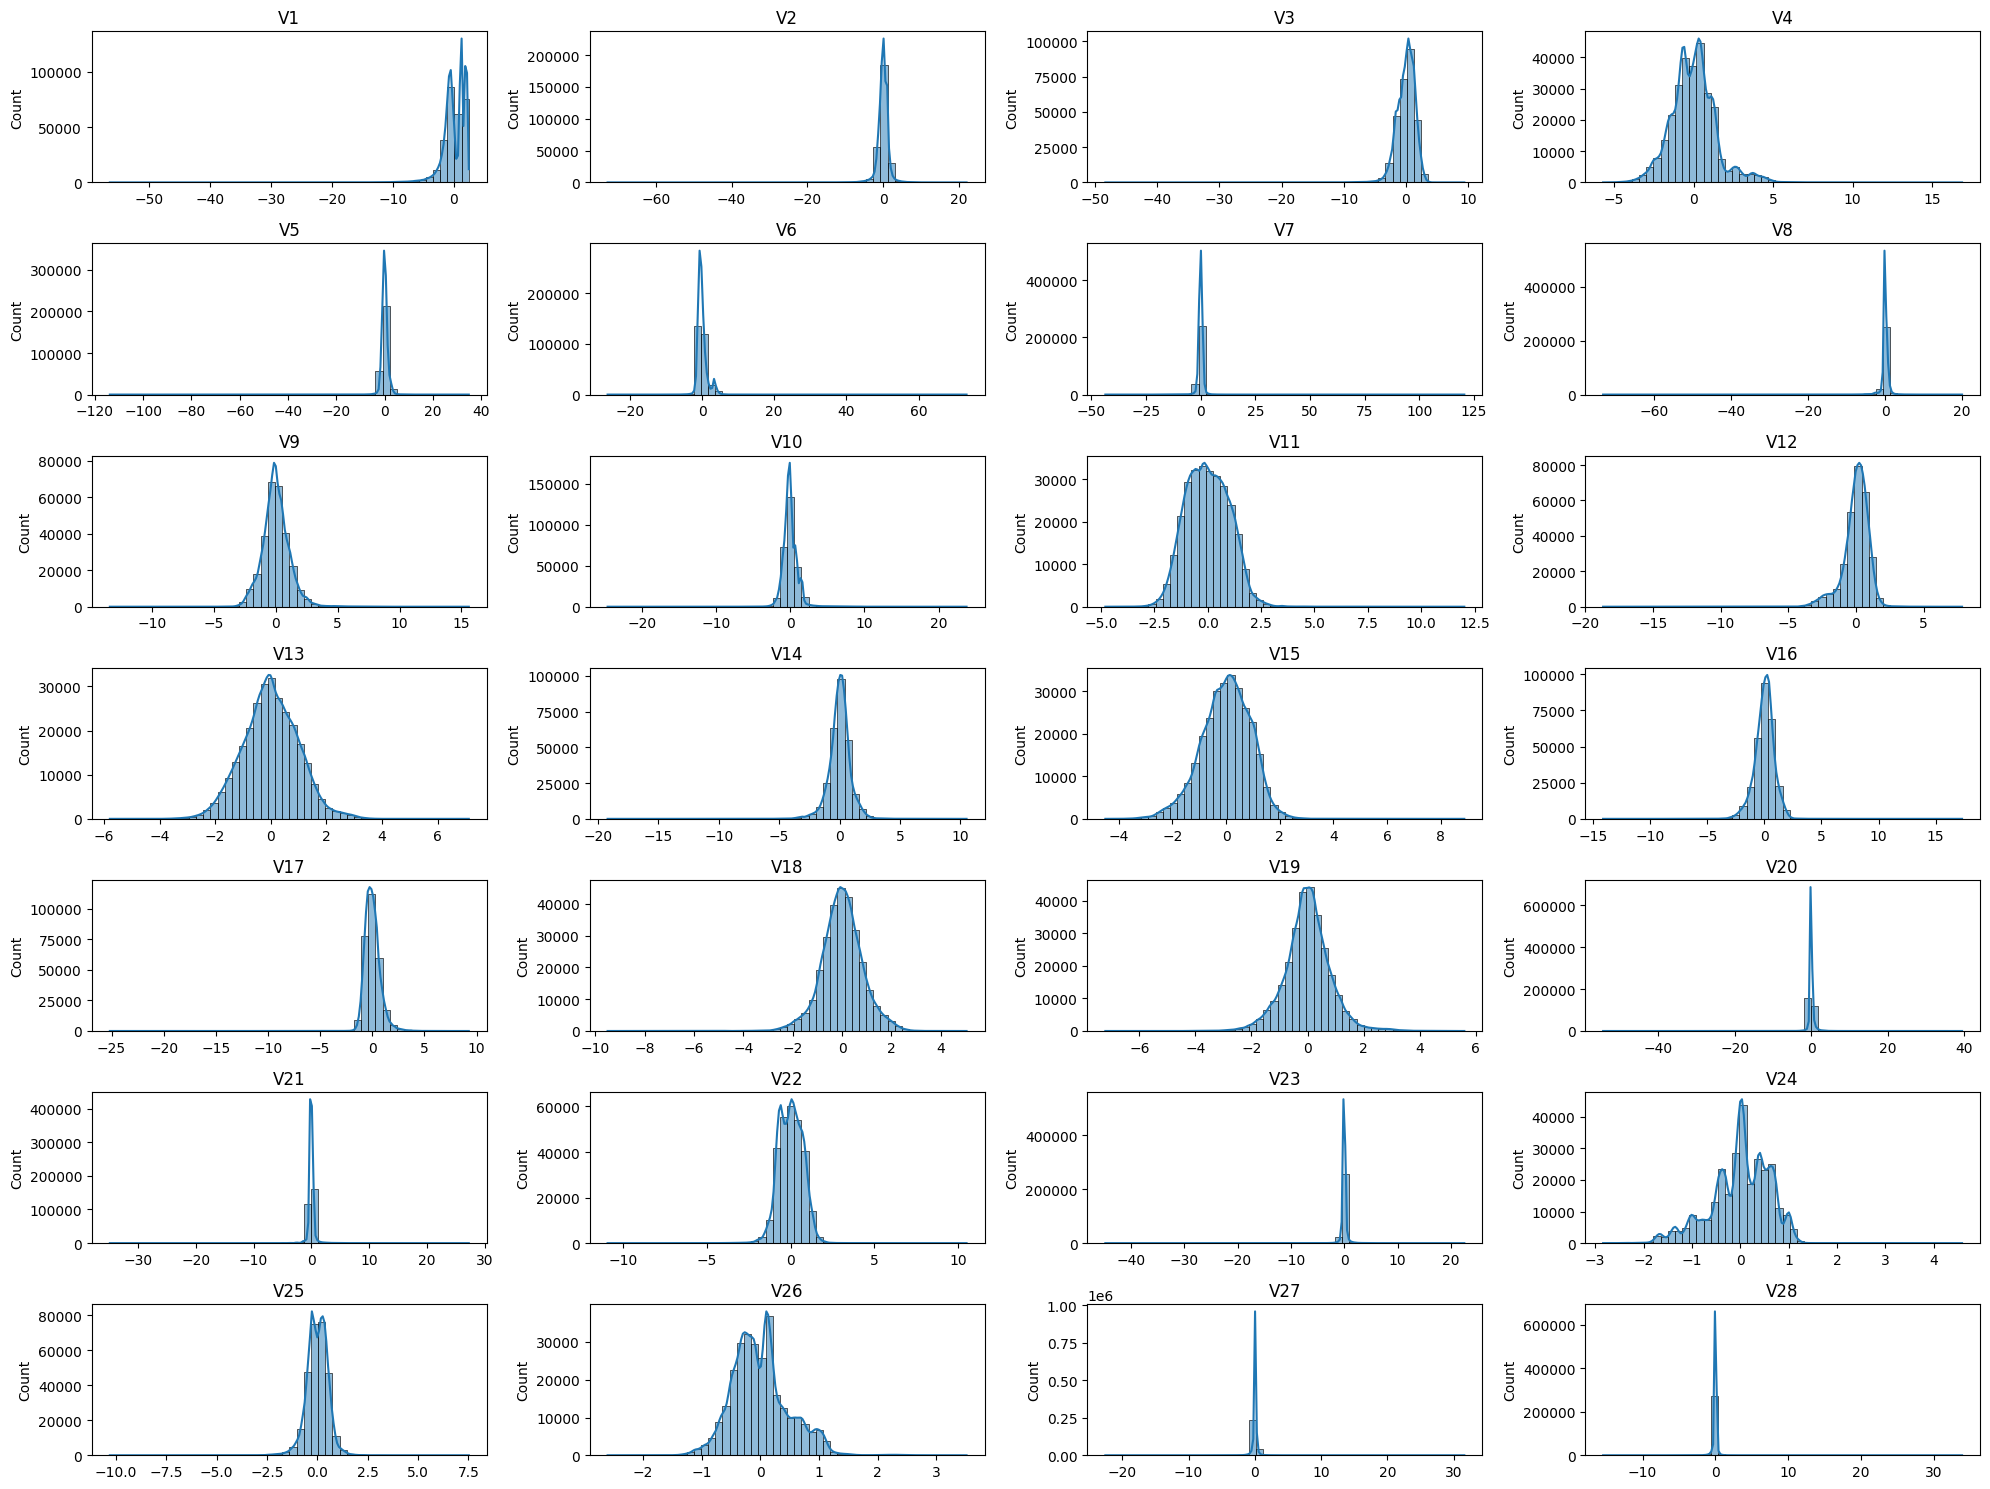

In [10]:
# Plot distributions for all PCA features
plt.figure(figsize=(20, 15))
for i, col in enumerate(creditcard_df.columns[1:29], 1):
    plt.subplot(7, 4, i)
    sns.histplot(creditcard_df[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Correlation Analysis

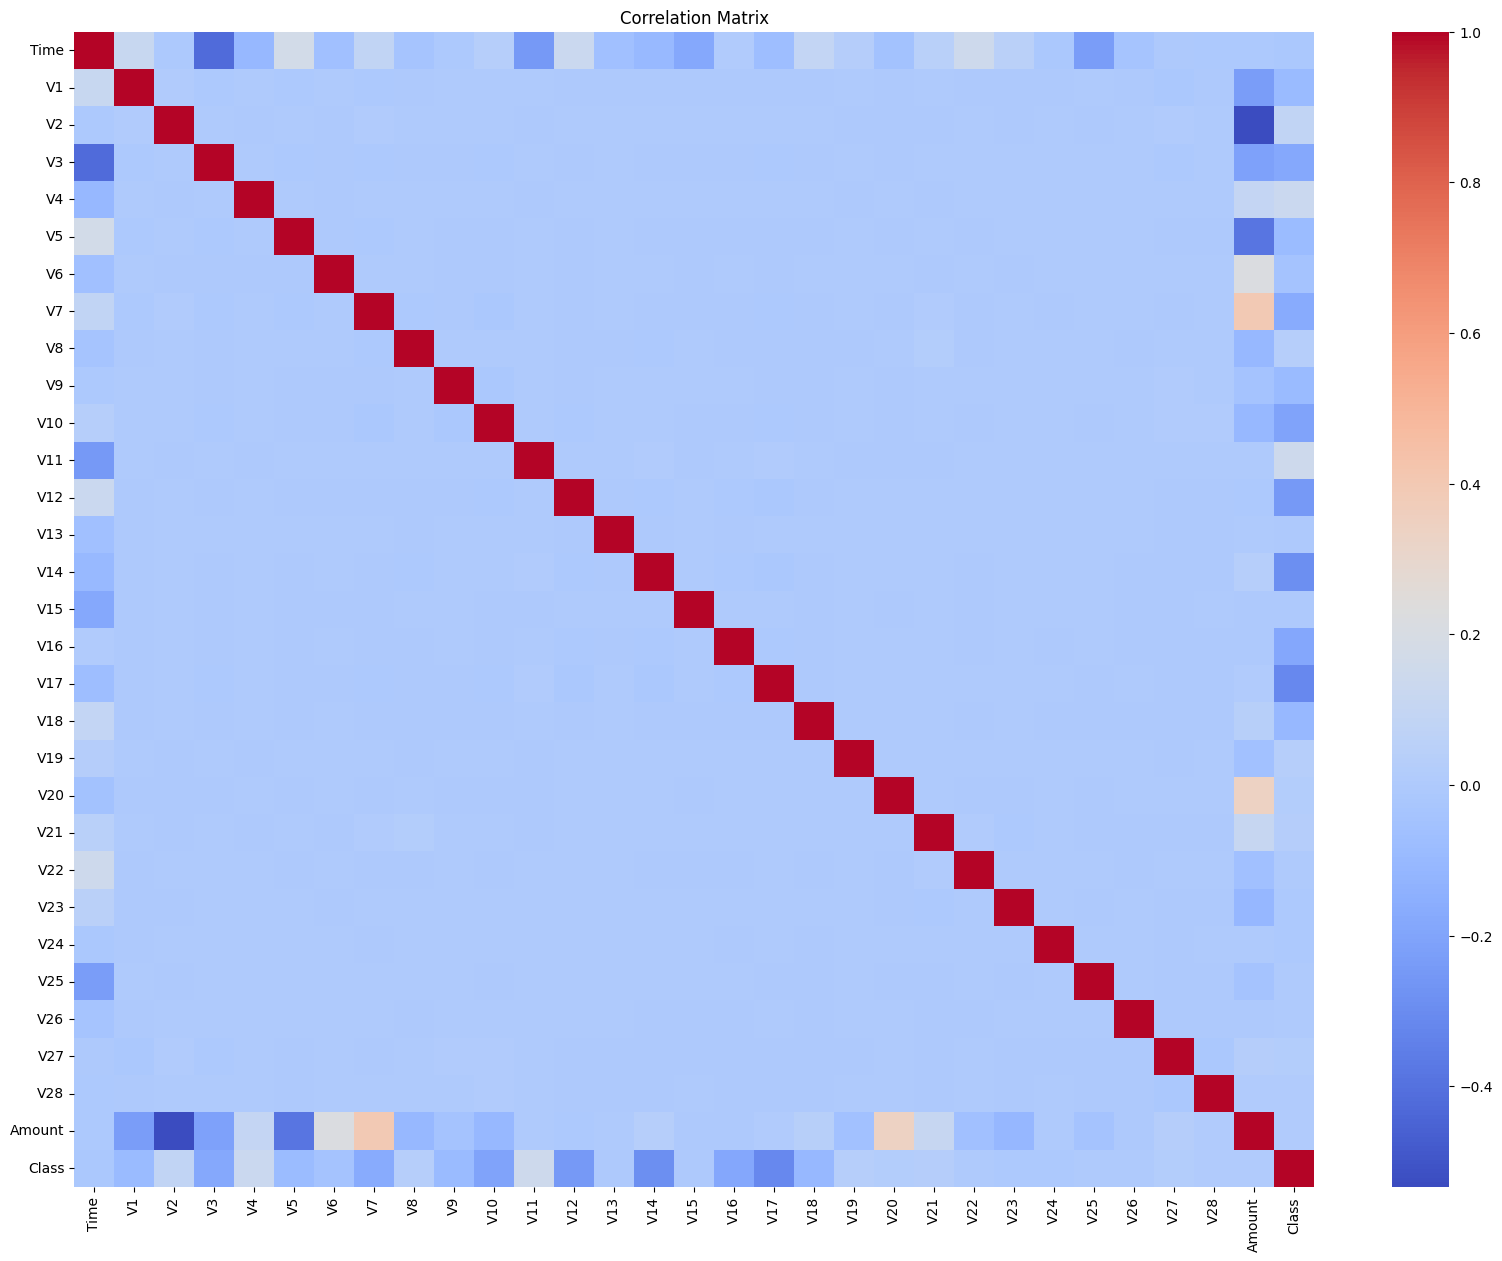

In [11]:
# Compute correlation matrix
corr_matrix = creditcard_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection
## detect outlier in variables Amount and Time

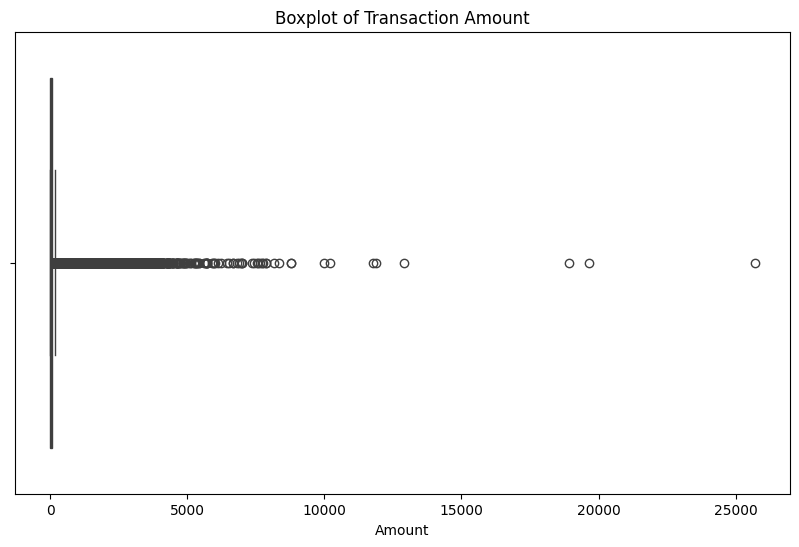

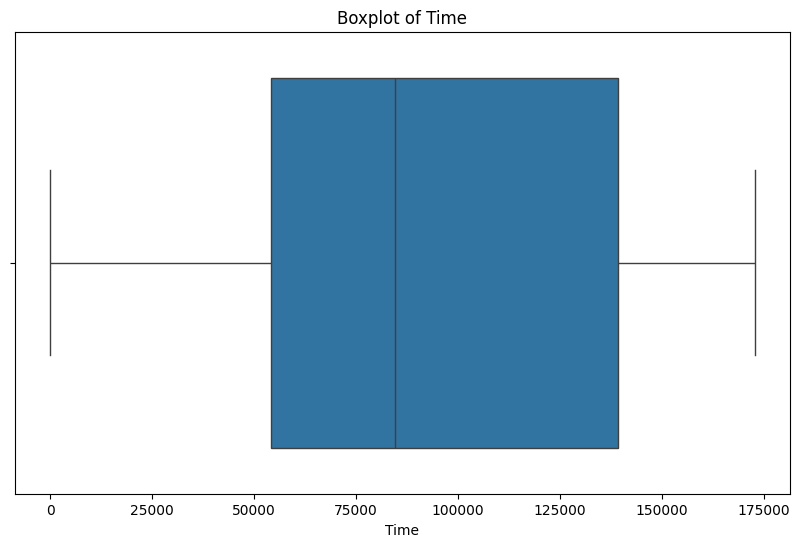

In [12]:
# Boxplot for Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=creditcard_df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

# Boxplot for Time
plt.figure(figsize=(10, 6))
sns.boxplot(x=creditcard_df['Time'])
plt.title('Boxplot of Time')
plt.show()

## Feature Engineering Insights

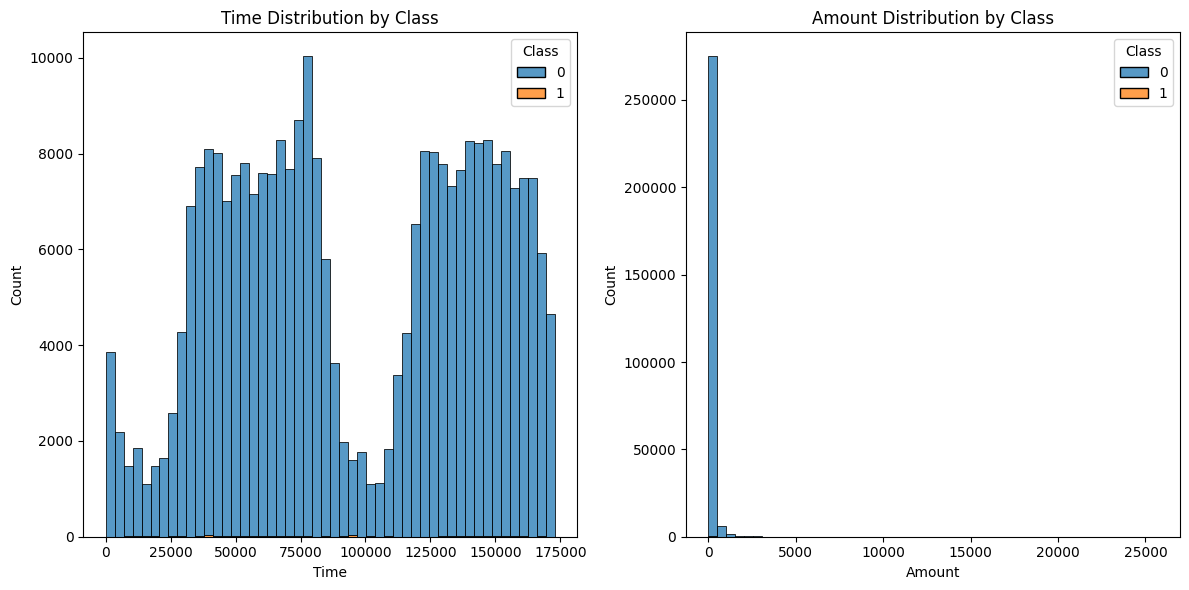

In [13]:
# Compare Time and Amount distributions by Class
plt.figure(figsize=(12, 6))

# Time
plt.subplot(1, 2, 1)
sns.histplot(data=creditcard_df, x='Time', hue='Class', bins=50, multiple='stack')
plt.title('Time Distribution by Class')

# Amount
plt.subplot(1, 2, 2)
sns.histplot(data=creditcard_df, x='Amount', hue='Class', bins=50, multiple='stack')
plt.title('Amount Distribution by Class')

plt.tight_layout()
plt.show()

# Next Steps
## Handle class imbalance, Address outliers, Building model for specific problem and other